# Movie Dataset Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazioni grafiche
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
movie_path = "../data/cleaned/movies.csv"
rating_path = "../data/cleaned/ratings.csv"

movie_df = pd.read_csv(movie_path)
rating_df = pd.read_csv(rating_path)

print("\nPrime 5 righe movies:")
print(movie_df.head())

print("\nPrime 5 righe ratings:")
print(rating_df.head())


Prime 5 righe movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                              genres  Fantasy  War  Action  \
0  ['Adventure', 'Animation', 'Children', 'Comedy...        1    0       0   
1               ['Adventure', 'Children', 'Fantasy']        1    0       0   
2                              ['Comedy', 'Romance']        0    0       0   
3                     ['Comedy', 'Drama', 'Romance']        0    0       0   
4                                         ['Comedy']        0    0       0   

   Sci-Fi  Mystery  Romance  Children  ...  (no genres listed)  Adventure  \
0       0        0        0         1  ...                   0          1   
1       0        0        0         1  ...           

### General stats

In [4]:
print("Total films:", movie_df.shape[0])
print("Total users:", rating_df['userId'].nunique())
print("Total ratings:", rating_df.shape[0])

# Average rating per film
avg_ratings = rating_df.groupby('movieId')['rating'].mean()
avg_ratings_df = avg_ratings.reset_index().merge(
    movie_df[['movieId', 'title']],
    on='movieId'
)
print("\nAverage rating for the first 5 films:")
print(avg_ratings.head())

# Top 10 most popular films (by number of ratings)
ratings_count = rating_df.groupby('movieId')['rating'].count()

ratings_count_df = ratings_count.reset_index(name='rating_count').merge(
    movie_df[['movieId', 'title']],
    on='movieId'
)

most_rated = ratings_count_df.sort_values(
    by='rating_count',
    ascending=False
).head(10)

print("\nTop 10 films by number of ratings:")
print(most_rated[['title', 'rating_count']])


Total films: 9742
Total users: 610
Total ratings: 100836

Average rating for the first 5 films:
movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Top 10 films by number of ratings:
                                          title  rating_count
314                         Forrest Gump (1994)           329
277            Shawshank Redemption, The (1994)           317
257                         Pulp Fiction (1994)           307
510            Silence of the Lambs, The (1991)           279
1938                         Matrix, The (1999)           278
224   Star Wars: Episode IV - A New Hope (1977)           251
418                        Jurassic Park (1993)           238
97                            Braveheart (1995)           237
507           Terminator 2: Judgment Day (1991)           224
461                     Schindler's List (1993)           220


### Plots

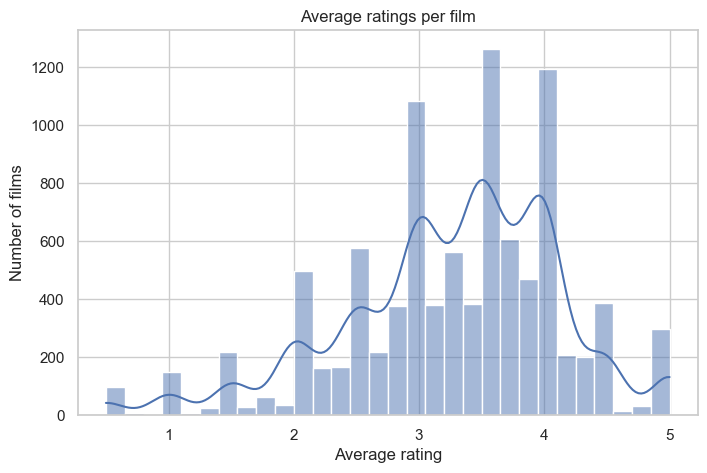

In [8]:
# Average rating
plt.figure(figsize=(8,5))
sns.histplot(avg_ratings, bins=30, kde=True)
plt.title("Average ratings per film")
plt.xlabel("Average rating")
plt.ylabel("Number of films")
plt.show()

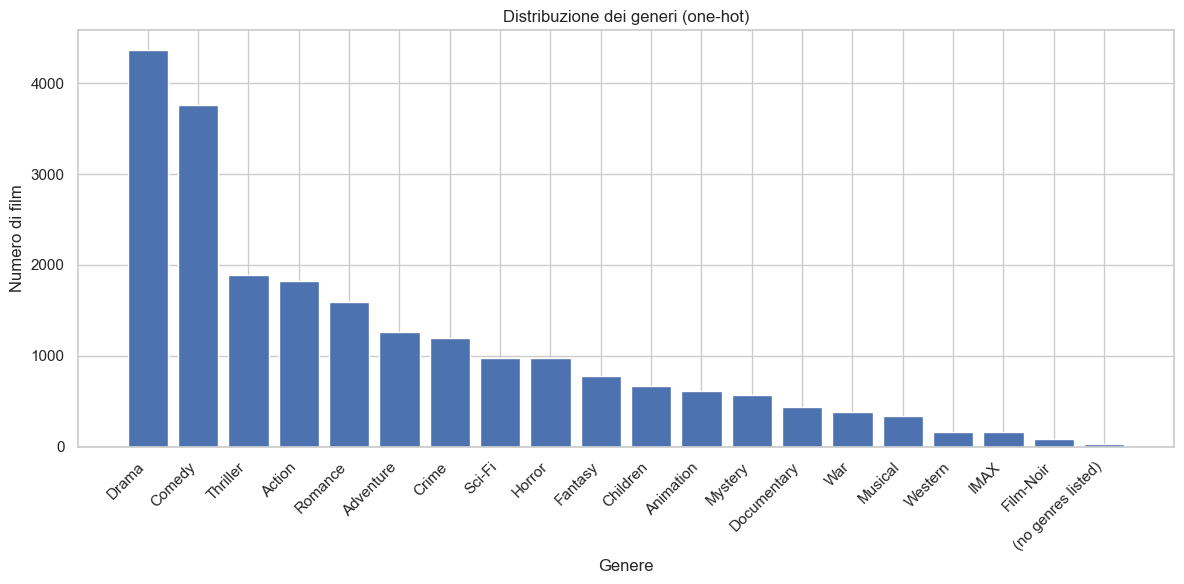

In [9]:
# Genre distribution (one-hot encoded)
non_genre_cols = ['movieId', 'title', 'genres']

genre_columns = [col for col in movie_df.columns if col not in non_genre_cols]

genre_counts = movie_df[genre_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(genre_counts.index, genre_counts.values)
plt.title("Distribuzione dei generi (one-hot)")
plt.xlabel("Genere")
plt.ylabel("Numero di film")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()